In [3]:
import tarfile
import netCDF4 as nc
from netCDF4 import Dataset
import os


# Define the path to the tar.gz file and the extraction directory
tar_gz_path = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\example_output.tar.gz"
extraction_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)"

In [5]:
# Directory containing the NetCDF files
data_surface_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL"
data_routing_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\ROUTING"

In [7]:
import os
import xarray as xr
# Function to recursively find all .nc files in a directory
def find_nc_files(directory):
    nc_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))
    return nc_files

In [9]:
# Find all .nc files in each directory
surface_files = find_nc_files(data_surface_dir)
routing_files = find_nc_files(data_routing_dir)

# Check if files were found
print(f'Found {len(surface_files)} files in surfacemodel')
print(f'Found {len(routing_files)} files in routing')

# Load datasets
ds_surface = xr.open_mfdataset(surface_files, combine='by_coords')
ds_routing = xr.open_mfdataset(routing_files, combine='by_coords')

Found 15339 files in surfacemodel
Found 5113 files in routing


In [11]:
import matplotlib.pyplot as plt

# Select the variable of interest
tws = ds_surface['TWS_tavg']  # Replace with your specific variable

In [13]:
tws.units

'mm'

In [15]:
# Load the data into memory
tw_data = tws.load()

# Compute basic statistics
tw_mean_value = tw_data.mean().values
tw_min_value = tw_data.min().values
tw_max_value = tw_data.max().values
tw_std_dev = tw_data.std().values

print(f"Mean: {tw_mean_value:.4f} mm")
print(f"Min: {tw_min_value:.4f} mm")
print(f"Max: {tw_max_value:.4f} mm")
print(f"Standard Deviation: {tw_std_dev:.4f} mm")

Mean: 5490.4771 mm
Min: 5021.3496 mm
Max: 5924.2964 mm
Standard Deviation: 245.9892 mm


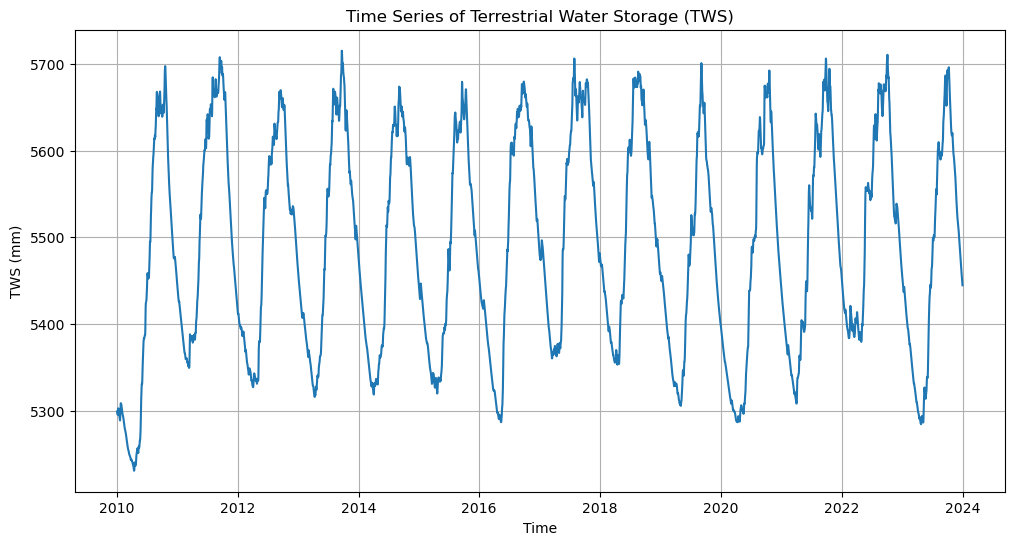

In [17]:
# Plot the overall time series at a sample location (mean over all spatial points)
tw_data_mean = tw_data.mean(dim=['north_south', 'east_west'])
tw_data_mean.plot(figsize=(12, 6))
plt.title('Time Series of Terrestrial Water Storage (TWS)')
plt.xlabel('Time')
plt.ylabel('TWS (mm)')
plt.grid()
plt.show()

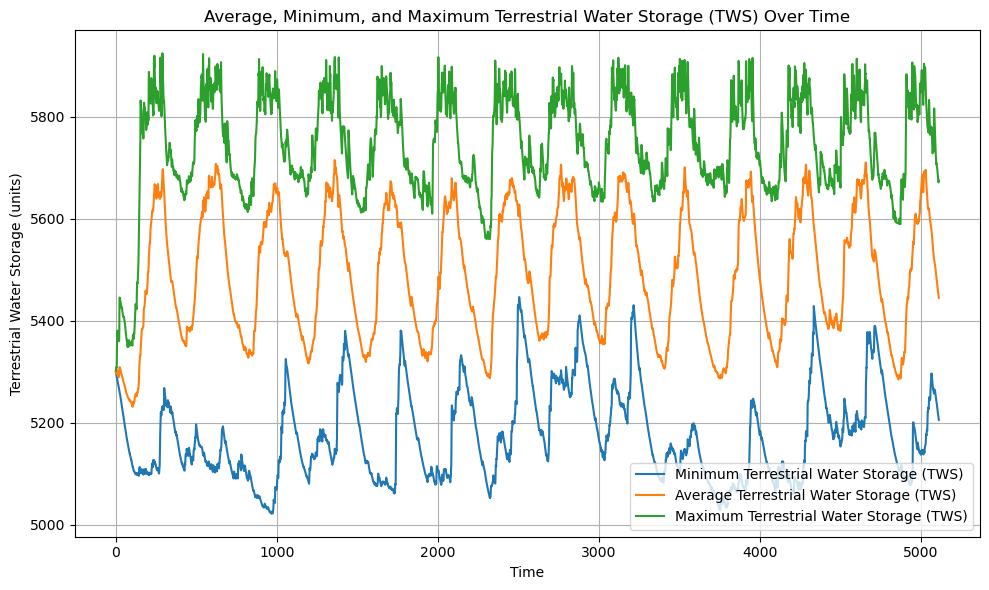

In [19]:
# Calculate
#tw_data_mean = tw_data.mean(dim=['north_south', 'east_west'])
tw_data_min = tw_data.min(dim=['north_south', 'east_west'])
tw_data_max = tw_data.max(dim=['north_south', 'east_west'])
tw_data_std_dev = tw_data.std(dim=['north_south', 'east_west'])
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot 
plt.plot(tw_data_min, label='Minimum Terrestrial Water Storage (TWS)')
plt.plot(tw_data_mean, label='Average Terrestrial Water Storage (TWS)')
plt.plot(tw_data_max, label='Maximum Terrestrial Water Storage (TWS)')

# Customize the plot
plt.title('Average, Minimum, and Maximum Terrestrial Water Storage (TWS) Over Time')
plt.xlabel('Time')
plt.ylabel('Terrestrial Water Storage (units)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()

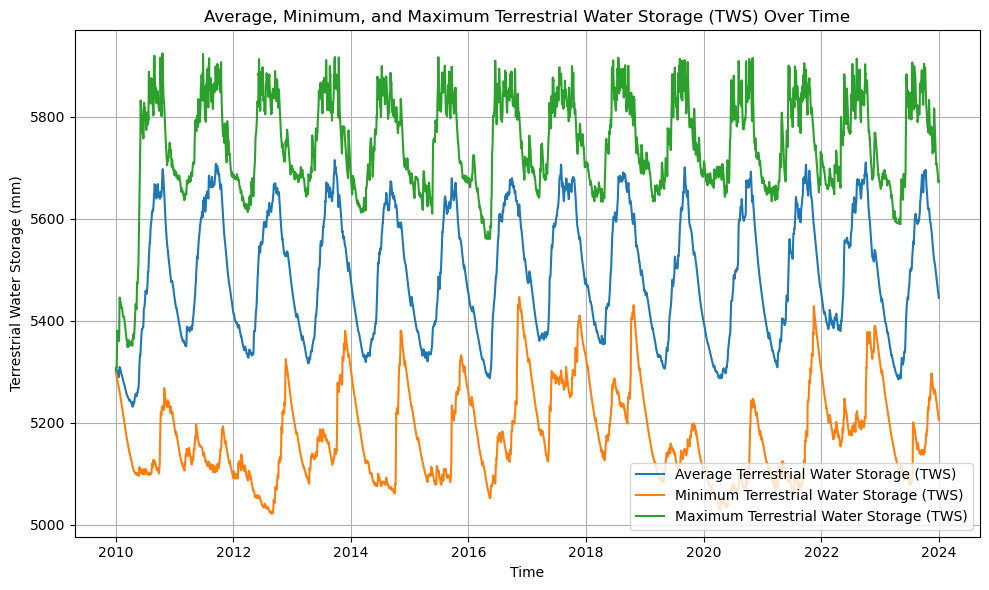

In [21]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(tw_data_mean.time.values, tw_data_mean.values, label='Average Terrestrial Water Storage (TWS) ')
plt.plot(tw_data_mean.time.values, tw_data_min.values, label='Minimum Terrestrial Water Storage (TWS) ')
plt.plot(tw_data_mean.time.values, tw_data_max.values, label='Maximum Terrestrial Water Storage (TWS)')

# Customize the plot
plt.title('Average, Minimum, and Maximum Terrestrial Water Storage (TWS) Over Time')
plt.xlabel('Time')
plt.ylabel('Terrestrial Water Storage (mm)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

#plt.savefig('time_soil_moisture_plot.png', dpi=300, bbox_inches='tight')
plt.show()

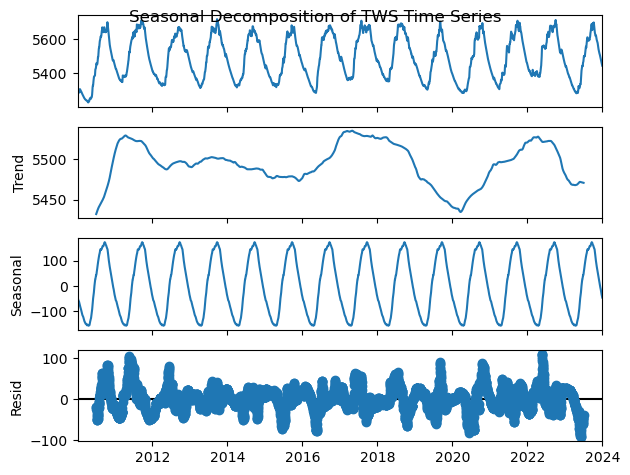

In [23]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the xarray DataArray to a pandas Series
tw_data_series = pd.Series(tw_data_mean.values, index=tw_data_mean['time'].values)

# Decompose the time series
decomposition = seasonal_decompose(tw_data_series, model='additive', period=365)  # Adjust period if necessary

# Plot the decomposed components
decomposition.plot()
plt.suptitle('Seasonal Decomposition of TWS Time Series')
plt.show()

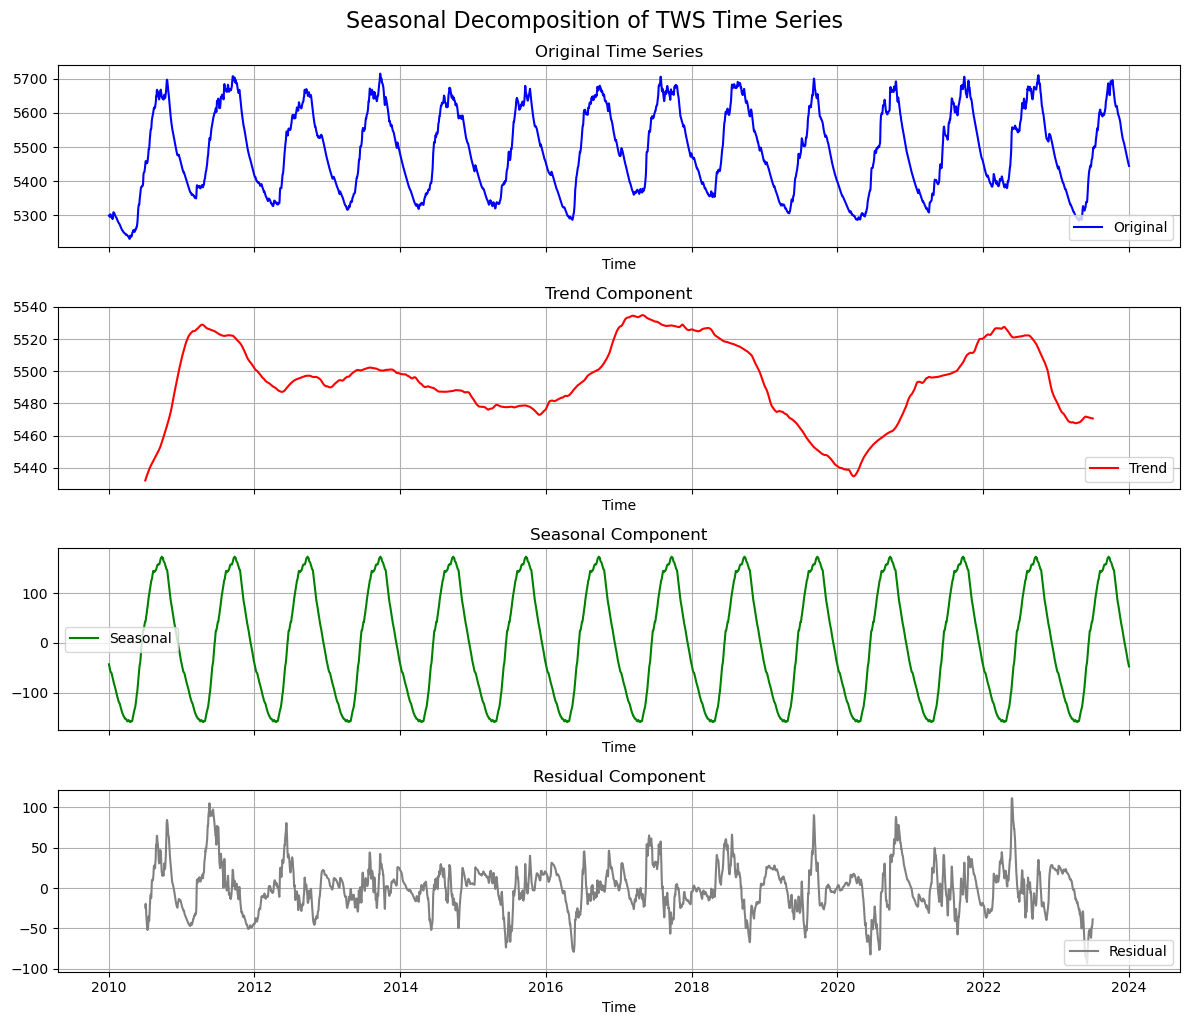

In [25]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot the original time series
axs[0].plot(tw_data_series.index, tw_data_series.values, label='Original', color='blue')
axs[0].set_title('Original Time Series')
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Plot the trend component
axs[1].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red')
axs[1].set_title('Trend Component')
axs[1].legend(loc='lower right')
axs[1].grid(True)

# Plot the seasonal component
axs[2].plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', color='green')
axs[2].set_title('Seasonal Component')
axs[2].legend()
axs[2].grid(True)

# Plot the residual component
axs[3].plot(decomposition.resid.index, decomposition.resid.values, label='Residual', color='gray')
axs[3].set_title('Residual Component')
axs[3].legend(loc='lower right')
axs[3].grid(True)

# Set x-axis label for all subplots
for ax in axs:
    ax.set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonal Decomposition of TWS Time Series', fontsize=16, y=1.02)  # Title and adjust y position
plt.show()

In [27]:
# Calculate the average soil moisture over time and plot it
soil_moisture = ds_surface['SoilMoist_tavg']
soil_moisture_avg = ds_surface['SoilMoist_tavg'].mean(axis=0).values

In [29]:
soil_moisture.units

'm^3 m-3'

In [31]:
# Load the data into memory
sm_data = soil_moisture.load()

# Compute basic statistics
sm_mean_value = sm_data.mean().values
sm_min_value = sm_data.min().values
sm_max_value = sm_data.max().values
sm_std_dev = sm_data.std().values

print(f"Mean: {sm_mean_value:.4f} m3/m3")
print(f"Min: {sm_min_value:.4f} m3/m3")
print(f"Max: {sm_max_value:.4f} m3/m3")
print(f"Standard Deviation: {tw_std_dev:.4f} m3/m3")

Mean: 0.2894 m3/m3
Min: 0.0446 m3/m3
Max: 0.4646 m3/m3
Standard Deviation: 245.9892 m3/m3


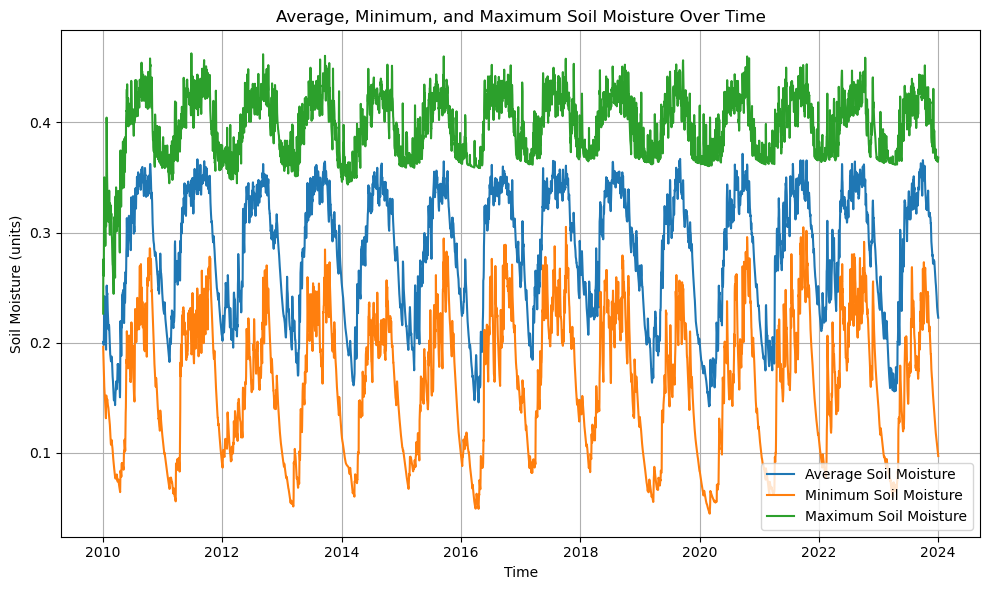

In [35]:
# Calculate statistics
sm_data_mean = sm_data[:,0].mean(dim=['north_south', 'east_west'])
sm_data_min = sm_data[:,0].min(dim=['north_south', 'east_west'])
sm_data_max = sm_data[:,0].max(dim=['north_south', 'east_west'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(sm_data_mean.time.values, sm_data_mean.values, label='Average Soil Moisture')
plt.plot(sm_data_mean.time.values, sm_data_min.values, label='Minimum Soil Moisture')
plt.plot(sm_data_mean.time.values, sm_data_max.values, label='Maximum Soil Moisture')

# Customize the plot
plt.title('Average, Minimum, and Maximum Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (units)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

plt.show()

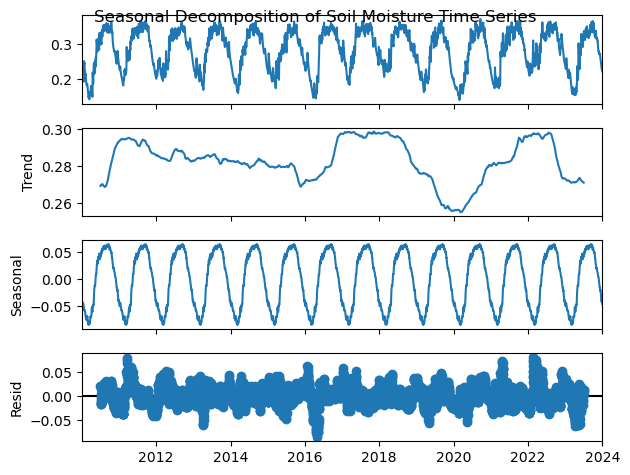

In [37]:
# Convert the xarray DataArray to a pandas Series
sm_data_series = pd.Series(sm_data_mean.values, index=tw_data_mean['time'].values)

# Decompose the time series
decomposition_sm = seasonal_decompose(sm_data_series, model='additive', period=365)  # Adjust period if necessary

# Plot the decomposed components
decomposition_sm.plot()
plt.suptitle('Seasonal Decomposition of Soil Moisture Time Series')
plt.show()

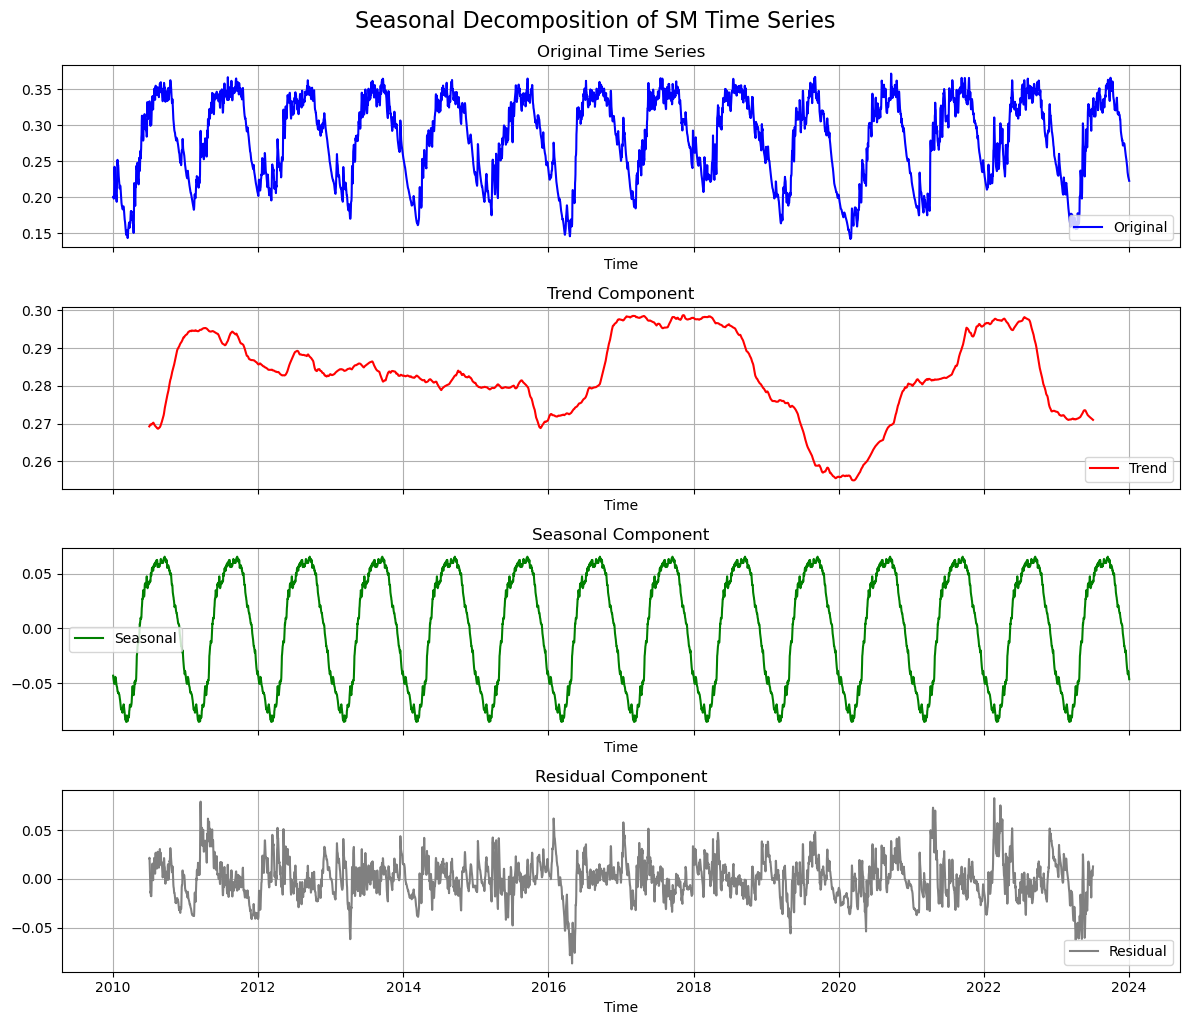

In [39]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot the original time series
axs[0].plot(sm_data_series.index, sm_data_series.values, label='Original', color='blue')
axs[0].set_title('Original Time Series')
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Plot the trend component
axs[1].plot(decomposition_sm.trend.index, decomposition_sm.trend.values, label='Trend', color='red')
axs[1].set_title('Trend Component')
axs[1].legend(loc='lower right')
axs[1].grid(True)

# Plot the seasonal component
axs[2].plot(decomposition_sm.seasonal.index, decomposition_sm.seasonal.values, label='Seasonal', color='green')
axs[2].set_title('Seasonal Component')
axs[2].legend()
axs[2].grid(True)

# Plot the residual component
axs[3].plot(decomposition_sm.resid.index, decomposition_sm.resid.values, label='Residual', color='gray')
axs[3].set_title('Residual Component')
axs[3].legend(loc='lower right')
axs[3].grid(True)

# Set x-axis label for all subplots
for ax in axs:
    ax.set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonal Decomposition of SM Time Series', fontsize=16, y=1.02)  # Title and adjust y position
plt.show()

In [41]:
# Calculate the average soil moisture over time and plot it
streamflow = ds_surface['Streamflow_tavg']
streamflow_avg = ds_surface['Streamflow_tavg'].mean(axis=0).values

In [43]:
streamflow.units

'm3 s-1'

In [45]:
# Load the data into memory
streamflow_data = streamflow.load()

# Compute basic statistics
streamflow_mean_value = streamflow_data.mean().values
streamflow_min_value = streamflow_data.min().values
streamflow_max_value = streamflow_data.max().values
streamflow_std_dev = streamflow_data.std().values

print(f"Mean: {streamflow_mean_value:.4f} m3/s")
print(f"Min: {streamflow_min_value:.4f} m3/s")
print(f"Max: {streamflow_max_value:.4f} m3/s")
print(f"Standard Deviation: {streamflow_std_dev:.4f} m3/s")

Mean: 120.7459 m3/s
Min: -414.8322 m3/s
Max: 21396.9824 m3/s
Standard Deviation: 646.3803 m3/s


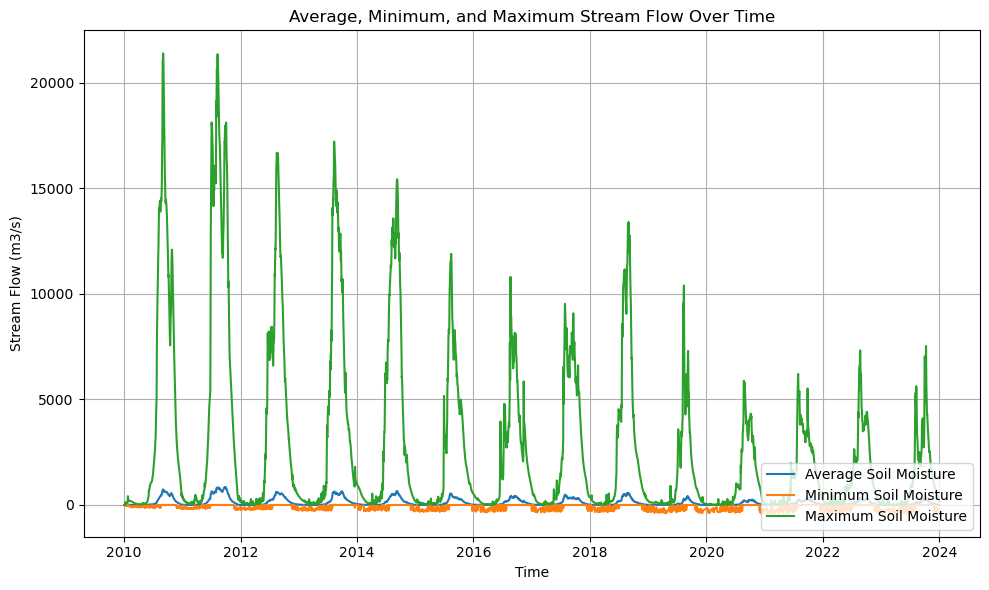

In [47]:
# Calculate statistics
streamflow_data_mean = streamflow_data.mean(dim=['north_south', 'east_west'])
streamflow_data_min = streamflow_data.min(dim=['north_south', 'east_west'])
streamflow_data_max = streamflow_data.max(dim=['north_south', 'east_west'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(streamflow_data_mean.time.values, streamflow_data_mean.values, label='Average Soil Moisture')
plt.plot(streamflow_data_mean.time.values, streamflow_data_min.values, label='Minimum Soil Moisture')
plt.plot(streamflow_data_mean.time.values, streamflow_data_max.values, label='Maximum Soil Moisture')

# Customize the plot
plt.title('Average, Minimum, and Maximum Stream Flow Over Time')
plt.xlabel('Time')
plt.ylabel('Stream Flow (m3/s)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

plt.show()

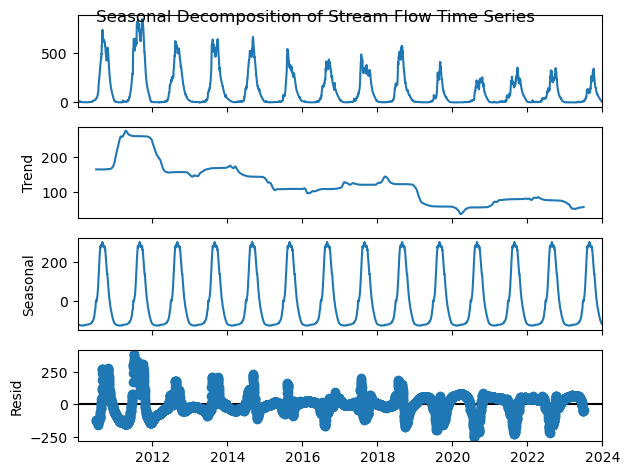

In [49]:
# Convert the xarray DataArray to a pandas Series
streamflow_data_series = pd.Series(streamflow_data_mean.values, index=tw_data_mean['time'].values)

# Decompose the time series
decomposition_st = seasonal_decompose(streamflow_data_series, model='additive', period=365)  # Adjust period if necessary

# Plot the decomposed components
decomposition_st.plot()
plt.suptitle('Seasonal Decomposition of Stream Flow Time Series')
plt.show()

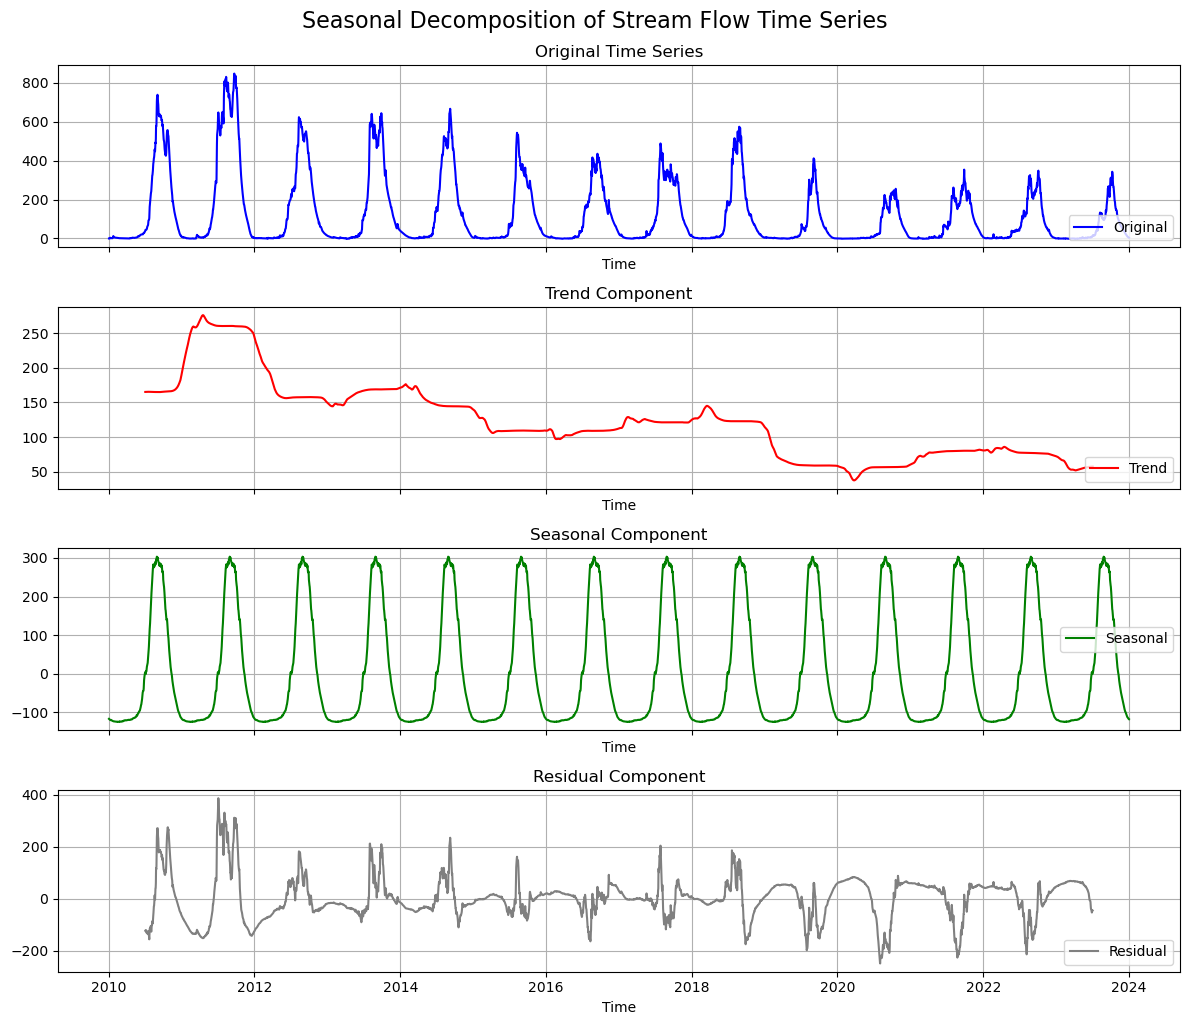

In [51]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot the original time series
axs[0].plot(streamflow_data_series.index, streamflow_data_series.values, label='Original', color='blue')
axs[0].set_title('Original Time Series')
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Plot the trend component
axs[1].plot(decomposition_st.trend.index, decomposition_st.trend.values, label='Trend', color='red')
axs[1].set_title('Trend Component')
axs[1].legend(loc='lower right')
axs[1].grid(True)

# Plot the seasonal component
axs[2].plot(decomposition_st.seasonal.index, decomposition_st.seasonal.values, label='Seasonal', color='green')
axs[2].set_title('Seasonal Component')
axs[2].legend()
axs[2].grid(True)

# Plot the residual component
axs[3].plot(decomposition_st.resid.index, decomposition_st.resid.values, label='Residual', color='gray')
axs[3].set_title('Residual Component')
axs[3].legend(loc='lower right')
axs[3].grid(True)

# Set x-axis label for all subplots
for ax in axs:
    ax.set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Stream Flow Time Series', fontsize=16, y=1.02)  # Title and adjust y position
plt.show()

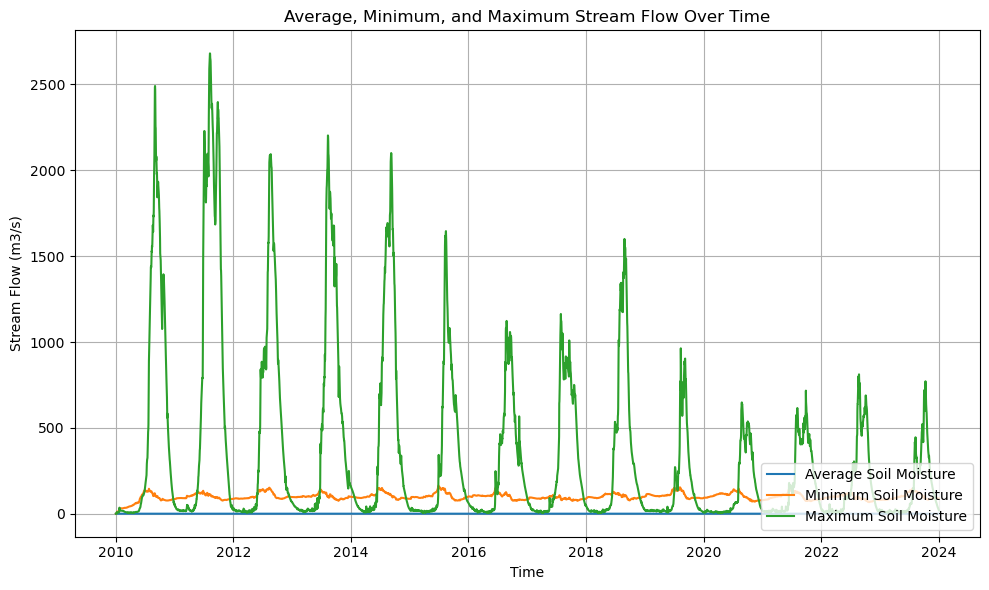

In [53]:
sm_data_std = sm_data[:,0,:,:].std(dim=['north_south', 'east_west'])
tw_data_std = tw_data.std(dim=['north_south', 'east_west'])
streamflow_data_std = streamflow_data.std(dim=['north_south', 'east_west'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(sm_data_std.time.values, sm_data_std.values, label='Average Soil Moisture')
plt.plot(sm_data_std.time.values, tw_data_std.values, label='Minimum Soil Moisture')
plt.plot(sm_data_std.time.values, streamflow_data_std.values, label='Maximum Soil Moisture')

# Customize the plot
plt.title('Average, Minimum, and Maximum Stream Flow Over Time')
plt.xlabel('Time')
plt.ylabel('Stream Flow (m3/s)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

plt.show()

In [ ]:
#Summary
#Trend Component: Use to analyze long-term changes and overall direction.
#Seasonal Component: Identify recurring patterns and plan accordingly.
#Residual Component: Detect anomalies or noise.
#Modeling and Forecasting: Use decomposed components to improve model performance.
#Decision Support: Apply insights to make informed decisions in relevant sectors.
#Understanding these components helps in gaining deeper insights into data and improving analysis and forecasting accuracy. 